In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [50]:
df_all = pd.read_csv('Archive/film_sec_final.csv')
df_all

section_1  section_1A  section_1B  section_2  section_3  section_4  \
0            0.0         0.0         0.0        0.0        0.0        0.0   
1            0.0         0.0         0.0        0.0        0.0        0.0   
2            0.0         0.0         0.0        0.0        0.0        0.0   
3            0.0         0.0         0.0        0.0        0.0        0.0   
4            0.0         0.0         0.0        0.0        0.0        0.0   
...          ...         ...         ...        ...        ...        ...   
54547        0.0         0.0         0.0        0.0        0.0        0.0   
54548        0.0         0.0         0.0        0.0        0.0        0.0   
54549        0.0         0.0         0.0        0.0        0.0        0.0   
54550        0.0         0.0         0.0        0.0        0.0        0.0   
54551        0.0         0.0         0.0        0.0        0.0        0.0   

       section_5  section_6  section_7  section_7A  ...  sic_0  sic_1  sic_2  \
0            0.0        0.0       -1.0         0.0  ...      0      0      0   
1            0.0        0.0       -1.0         0.0  ...      0      0      0   
2            0.0        0.0       -1.0         0.0  ...      0      0      0   
3            0.0        0.0       -1.0         0.0  ...      0      0      0   
4            0.0        0.0        0.0         0.0  ...      0      0      0   
...          ...        ...        ...         ...  ...    ...    ...    ...   
54547        0.0        0.0        0.0         0.0  ...      0      0      0   
54548        0.0        0.0        0.0         0.0  ...      0      0      0   
54549        0.0        0.0        0.0         0.0  ...      0      0      0   
54550        0.0        0.0        0.0         0.0  ...      0      0      0   
54551        0.0        0.0        0.0         0.0  ...      0      0      0   

       sic_3  sic_4  sic_5  sic_6  sic_7  sic_8  sic_9  
0          0      0      1      0      0      0      0  
1          0      0      1      0      0      0      0  
2          0      0      1      0      0      0      0  
3          0      0      1      0      0      0      0  
4          0      0      0      0      1      0      0  
...      ...    ...    ...    ...    ...    ...    ...  
54547      1      0      0      0      0      0      0  
54548      0      1      0      0      0      0      0  
54549      0      1      0      0      0      0      0  
54550      0      1      0      0      0      0      0  
54551      0      1      0      0      0      0      0  

[54552 rows x 88 columns]

In [53]:
# Creates a sample of the data that only contains 1 time window instead of all 4
df_clean = df_all[df_all['Window']=='30']
df_clean

section_1  section_1A  section_1B  section_2  section_3  section_4  \
1            0.0         0.0         0.0        0.0        0.0        0.0   
5            0.0         0.0         0.0        0.0        0.0        0.0   
9            0.0         0.0         0.0        0.0        0.0        0.0   
13           0.0         0.0         0.0        0.0        0.0        0.0   
17           0.0         0.0         0.0        0.0        0.0        0.0   
...          ...         ...         ...        ...        ...        ...   
54533        0.0         0.0         0.0        0.0        0.0        0.0   
54537        0.0         0.0         0.0        0.0        0.0        0.0   
54541        0.0         0.0         0.0        0.0        0.0        0.0   
54545        0.0         0.0         0.0        0.0        0.0        0.0   
54549        0.0         0.0         0.0        0.0        0.0        0.0   

       section_5  section_6  section_7  section_7A  ...  sic_0  sic_1  sic_2  \
1            0.0        0.0       -1.0         0.0  ...      0      0      0   
5            0.0        0.0        0.0         0.0  ...      0      0      0   
9            0.0        0.0        0.0         0.0  ...      0      0      0   
13           0.0        0.0        0.0         0.0  ...      0      0      0   
17           0.0        0.0        1.0         0.0  ...      0      0      0   
...          ...        ...        ...         ...  ...    ...    ...    ...   
54533        0.0        0.0        0.0         0.0  ...      0      1      0   
54537        0.0        0.0        0.0         0.0  ...      0      1      0   
54541        0.0        0.0        0.0         0.0  ...      0      0      0   
54545        0.0        0.0        0.0         0.0  ...      0      0      0   
54549        0.0        0.0        0.0         0.0  ...      0      0      0   

       sic_3  sic_4  sic_5  sic_6  sic_7  sic_8  sic_9  
1          0      0      1      0      0      0      0  
5          0      0      0      0      1      0      0  
9          0      0      1      0      0      0      0  
13         0      0      0      0      1      0      0  
17         0      0      0      0      1      0      0  
...      ...    ...    ...    ...    ...    ...    ...  
54533      0      0      0      0      0      0      0  
54537      0      0      0      0      0      0      0  
54541      0      0      0      0      1      0      0  
54545      1      0      0      0      0      0      0  
54549      0      1      0      0      0      0      0  

[13638 rows x 88 columns]

In [10]:
# Filter for unique CIK values (drop duplicates)
df_unique_cik = df_all.drop_duplicates(subset='CIK')

# Optional: unique CIK values as a list
unique_ciks = df_unique_cik['CIK'].unique()

# Print result
print(f"Number of unique CIKs: {len(unique_ciks)}")


Number of unique CIKs: 2689


In [11]:
# Referencing Data counts that C. Wengert made
print(f'After removing SIC 6: Total Amount: 19078, Filings lost {19078 - 14507}')
print(f'After removing where total assets is zero: Total Amount: 13638, Filings lost {14507 - 13638}')


After removing SIC 6: Total Amount: 19078, Filings lost 4571
After removing where total assets is zero: 13638, Filings lost 869


In [12]:
# Loading Dataframe that contains information on the complexity of a company
complex_df = pd.read_csv('Archive/complexity_split.csv')

# Drop the complexity_score column
complex_df = complex_df.drop(columns='complexity_score')

# Remove duplicate (cik, filing_date) pairs, keeping the first occurrence
complex_df = complex_df.drop_duplicates(subset=['cik', 'filing_date'], keep='first')

complex_df


cik  filing_date complexity
0      1123316     20160129        low
1       740664     20160128        low
2      1120970     20160128        low
3      1173420     20160127        low
4      1614818     20160126        low
...        ...          ...        ...
17599   788329     20231208       high
17600   924383     20231207       high
17601  1235468     20231207       high
17602   744452     20231207       high
17603    80420     20231206       high

[17527 rows x 3 columns]

In [54]:
# Merging both data frames to have the information about the complexity in the dataframe containing all other information
merged_df = pd.merge(
    df_clean,
    complex_df,
    left_on=['cik', 'filing_date'],
    right_on=['cik', 'filing_date'],
    how='left'
)


In [55]:
# Ensure the 'complexity' column is of type object (string)
merged_df['complexity'] = merged_df['complexity'].astype(str)

# Filter for 'low' complexity
low_complex_df = merged_df[merged_df['complexity'] == 'low'].copy()

# Filter for 'high' complexity
high_complex_df = merged_df[merged_df['complexity'] == 'high'].copy()

# Optional: show shapes
print(f"Low complexity rows: {low_complex_df.shape[0]}")
print(f"High complexity rows: {high_complex_df.shape[0]}")


Low complexity rows: 6281
High complexity rows: 7357


In [65]:
# Reduce dataframe so that only unique companies are present
only_unique_firms_low_complex_df = low_complex_df.drop_duplicates(subset=['cik'], keep='first')
only_unique_firms_low_complex_df

section_1  section_1A  section_1B  section_2  section_3  section_4  \
0            0.0         0.0         0.0        0.0        0.0        0.0   
5            0.0         0.0         0.0        0.0        0.0        0.0   
6            0.0         0.0         0.0        0.0        0.0        0.0   
7            0.0         0.0         0.0        0.0        0.0        0.0   
12           0.0         0.0         0.0        0.0        0.0        0.0   
...          ...         ...         ...        ...        ...        ...   
13370        0.0         0.0         0.0        0.0        0.0        0.0   
13397        0.0         0.0         0.0        0.0        0.0        0.0   
13460        0.0         0.0         0.0        0.0        0.0        0.0   
13473        0.0         0.0         0.0        0.0        0.0        0.0   
13610        0.0         0.0         0.0        0.0        0.0        0.0   

       section_5  section_6  section_7  section_7A  ...  sic_1  sic_2  sic_3  \
0            0.0        0.0       -1.0         0.0  ...      0      0      0   
5            0.0        0.0        0.0         0.0  ...      0      0      1   
6            0.0        0.0        0.0         0.0  ...      1      0      0   
7            0.0        0.0        0.0         0.0  ...      1      0      0   
12           0.0        0.0       -1.0         0.0  ...      0      1      0   
...          ...        ...        ...         ...  ...    ...    ...    ...   
13370        0.0        0.0        0.0         0.0  ...      0      0      1   
13397        0.0        0.0        0.0         0.0  ...      0      0      0   
13460        0.0        0.0        1.0         0.0  ...      0      0      1   
13473        0.0        0.0        0.0         0.0  ...      0      0      1   
13610        0.0        0.0        0.0         0.0  ...      0      0      1   

       sic_4  sic_5  sic_6  sic_7  sic_8  sic_9  complexity  
0          0      1      0      0      0      0         low  
5          0      0      0      0      0      0         low  
6          0      0      0      0      0      0         low  
7          0      0      0      0      0      0         low  
12         0      0      0      0      0      0         low  
...      ...    ...    ...    ...    ...    ...         ...  
13370      0      0      0      0      0      0         low  
13397      0      0      0      1      0      0         low  
13460      0      0      0      0      0      0         low  
13473      0      0      0      0      0      0         low  
13610      0      0      0      0      0      0         low  

[1397 rows x 89 columns]

In [66]:
# Reduce dataframe so that only unique companies are present
only_unique_firms_high_complex_df = high_complex_df.drop_duplicates(subset=['cik'], keep='first')
only_unique_firms_high_complex_df

section_1  section_1A  section_1B  section_2  section_3  section_4  \
1            0.0         0.0         0.0        0.0        0.0        0.0   
2            0.0         0.0         0.0        0.0        0.0        0.0   
3            0.0         0.0         0.0        0.0        0.0        0.0   
4            0.0         0.0         0.0        0.0        0.0        0.0   
8            0.0         0.0         0.0        0.0        0.0        0.0   
...          ...         ...         ...        ...        ...        ...   
13486        0.0         0.0         0.0        0.0        0.0        0.0   
13494        0.0         0.0         0.0        0.0        0.0        0.0   
13516        0.0         0.0         0.0        0.0        0.0        0.0   
13520        0.0         0.0         0.0        0.0        0.0        0.0   
13529        0.0         0.0         0.0        0.0        0.0        0.0   

       section_5  section_6  section_7  section_7A  ...  sic_1  sic_2  sic_3  \
1            0.0        0.0        0.0         0.0  ...      0      0      0   
2            0.0        0.0        0.0         0.0  ...      0      0      0   
3            0.0        0.0        0.0         0.0  ...      0      0      0   
4            0.0        0.0        1.0         0.0  ...      0      0      0   
8            0.0        0.0        0.0         0.0  ...      0      0      0   
...          ...        ...        ...         ...  ...    ...    ...    ...   
13486        0.0        0.0        0.0         0.0  ...      0      1      0   
13494        0.0        0.0        0.0         0.0  ...      0      0      0   
13516        0.0        0.0        0.0         0.0  ...      0      0      0   
13520        0.0        0.0        0.0         0.0  ...      0      0      0   
13529        0.0        0.0        0.0         0.0  ...      1      0      0   

       sic_4  sic_5  sic_6  sic_7  sic_8  sic_9  complexity  
1          0      0      0      1      0      0        high  
2          0      1      0      0      0      0        high  
3          0      0      0      1      0      0        high  
4          0      0      0      1      0      0        high  
8          0      0      0      1      0      0        high  
...      ...    ...    ...    ...    ...    ...         ...  
13486      0      0      0      0      0      0        high  
13494      0      0      0      1      0      0        high  
13516      0      1      0      0      0      0        high  
13520      0      1      0      0      0      0        high  
13529      0      0      0      0      0      0        high  

[1292 rows x 89 columns]

In [57]:
# Define columns of interest
columns_of_interest = ['Total Assets', 'S&P500 Log Return']

# Ensure numeric and replace 0 or 0.0 with NaN
for col in columns_of_interest:
    # Convert to numeric
    low_complex_df[col] = pd.to_numeric(low_complex_df[col], errors='coerce')
    high_complex_df[col] = pd.to_numeric(high_complex_df[col], errors='coerce')
    
    # Replace zeros with NaN
    # low_complex_df.loc[low_complex_df[col] == 0, col] = np.nan
    # high_complex_df.loc[high_complex_df[col] == 0, col] = np.nan

# Compute stats
low_stats = low_complex_df[columns_of_interest].agg(['mean', 'std'])
high_stats = high_complex_df[columns_of_interest].agg(['mean', 'std'])

# Display results
print("Low Complexity Stats:")
print(low_stats)
print("\nHigh Complexity Stats:")
print(high_stats)


Low Complexity Stats:
      Total Assets  S&P500 Log Return
mean  1.435730e+09           0.007406
std   2.210301e+10           0.067710

High Complexity Stats:
      Total Assets  S&P500 Log Return
mean  6.289770e+09           0.001288
std   2.699149e+10           0.071797


present_divisions: ['Agriculture, Forestry and Fishing', 'Construction', 'Manufacturing', 'Mining', 'Retail Trade', 'Wholesale Trade', 'Services', 'Transportation, Communications, Electric, Gas and Sanitary service', 'not reported']
sic_division
1      328
2      412
3    31320
4     1556
5     3112
6     1508
7    11756
8     3572
9      988
Name: count, dtype: int64
sic_division
1      82.0
2     103.0
3    7830.0
4     389.0
5     778.0
6     377.0
7    2939.0
8     893.0
9     247.0
Name: count, dtype: float64


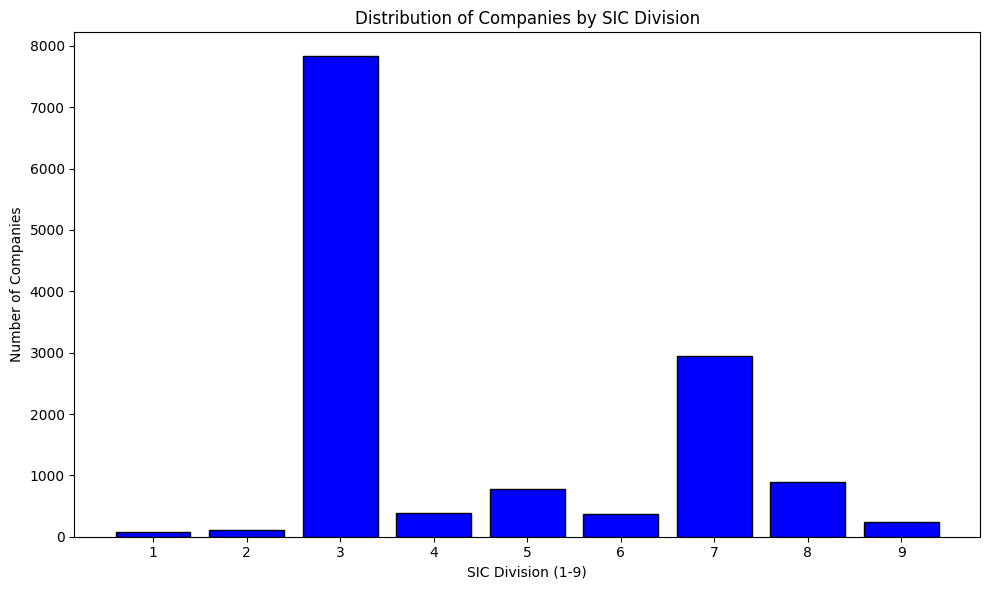

In [48]:
# Create new column that specifies the exact SIC division

def map_sic(code):
    if pd.isna(code):
        return None
    
    if 100 <= code <= 999:
        return 'Agriculture, Forestry and Fishing'
    
    elif 1500 <= code <= 1799:
        return 'Construction'
    
    elif code == 0:
        return 'not reported'
    
    elif 6000 <= code <= 6799:
        return 'Finance, Insurance and Real estate'
    
    elif 2000 <= code <= 3999:
        return 'Manufacturing'
    
    elif 1000 <= code <= 1499:
        return 'Mining'
    
    elif 9900 <= code <= 9999:
        return 'Nonclassifiable'
    
    elif 9100 <= code <= 9729:
        return 'Public administration'
    
    elif 5200 <= code <= 5999:
        return 'Retail Trade'
    
    elif 7000 <= code <= 8999:
        return 'Services'
    
    elif 4000 <= code <= 4999:
        return 'Transportation, Communications, Electric, Gas and Sanitary service'
    
    elif 5000 <= code <= 5199:
        return 'Wholesale Trade'
    
    else:
        return None

df_all['sic_division'] = df_all['sic_code'].apply(map_sic)



# 1. Remove duplicates by CIK
df_unique = df_all.drop_duplicates(subset=['CIK', 'filing_date'], keep='first')
df_unique = df_all.copy()


sic_order = [
    'Agriculture, Forestry and Fishing',
    'Construction',
    'Finance, Insurance and Real estate',
    'Manufacturing',
    'Mining',
    'Public administration',
    'Retail Trade',
    'Wholesale Trade',
    'Services',
    'Transportation, Communications, Electric, Gas and Sanitary service',
    'not reported',
    'Nonclassifiable',
]

# Only keep divisions present in your data
present_divisions = [d for d in sic_order if d in df_unique['sic_division'].unique()]
division_to_number = {div: i+1 for i, div in enumerate(present_divisions)}


print(f'present_divisions: {present_divisions}')

# 3. Count companies per SIC division
count_per_division = df_unique['sic_division'].map(division_to_number).value_counts().sort_index()

print(count_per_division/4)

corrected_count_per_division = count_per_division/4

# 4. Plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

ax.bar(corrected_count_per_division.index, corrected_count_per_division.values, color='blue', edgecolor='k')

ax.set_xlabel('SIC Division (1-{})'.format(len(corrected_count_per_division)))
ax.set_ylabel('Number of Companies')
ax.set_title('Distribution of Companies by SIC Division')

plt.xticks(corrected_count_per_division.index)  # just numbers 1-8
plt.tight_layout()

plt.savefig('sic_division_distribution.png', dpi=300, facecolor='white')
plt.show()
